# Data Science with pandas (part 1)

## Preliminaries

### Importing package and checking version

In [2]:
import pandas as pd
print(pd.__version__)

1.4.2


Let's try out the Pandas library!

### Verifying current directory and set up data directory 

In [3]:
import os
cwd = os.getcwd()
print(cwd)

/Volumes/Samsung_T5/uu_job/workshops/workshop-introduction-to-python/book


In [4]:
data_file = './data/surveys.csv'

In [5]:
print(os.path.exists(data_file))

True


### Reading the CSV file into a pandas DataFrame and giving a quick look

In [6]:
surveys_df = pd.read_csv(data_file)

print(type(data_file))
print(type(surveys_df))

<class 'str'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


<div class="alert alert-block alert-warning">
<b>TRY IT YOURSELF:</b> Type the following commands and check out the outputs. Can you tell what each command does? What is the difference between commands with and without parenthesis?
</div>

```python
surveys_df.shape
surveys_df.columns
surveys_df.index
surveys_df.dtypes
surveys_df.head(<try_various_integers_here>)
surveys_df.tail(<try_various_integers_here>)
```

## Basic statistics

Let's first visualise all the column names in the data frame

In [8]:
print(surveys_df.columns)

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


We can use the loops we learned this morning to print them one by one:

In [9]:
for column in surveys_df.columns:
    print(column)

record_id
month
day
year
plot_id
species_id
sex
hindfoot_length
weight


Let's select the column *weight* and run some statistics on it

In [10]:
weight = surveys_df['weight']
print(type(weight))

<class 'pandas.core.series.Series'>


*weight* is a pandas core object, a **Series**. You can think at a pandas Series as a python list, or numpy array, with extra powers. One of these extra powers allows usa to make a simple plot, just to have a first glance at data: 

<AxesSubplot:ylabel='Frequency'>

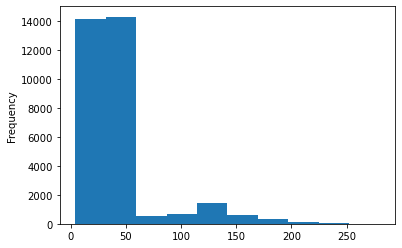

In [11]:
%matplotlib inline
weight.plot(kind='hist')

<div class="alert alert-block alert-warning">
<b>TRY IT YOURSELF:</b> Perform some basic statistics on the "weight" column. Can you tell what each method does? Look at our explorative plot, does the statistics you computed make sense?
</div>

```python
weight.min()
weight.max()
weight.mean()
weight.std()
weight.counts()
```

Let's get statistical summary in one line

In [12]:
weight.describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

Let's look at another columns and check if all its values are unique:

In [13]:
print(len(surveys_df['plot_id']))
print(surveys_df['plot_id'].nunique())

35549
24


## Grouping

Shall we add a session with statistics with grouping?

## Indexing, Slicing, and Subsetting DataFrames

### Selecting 

Let's look again at the DataFrame columns using a loop

In [14]:
sel_index = 5
for i,col in enumerate(surveys_df.columns):
    if i == sel_index:
        print('{}) {} <==='.format(i,col))
    else:
        print('{}) {}'.format(i,col))

0) record_id
1) month
2) day
3) year
4) plot_id
5) species_id <===
6) sex
7) hindfoot_length
8) weight


We already discussed how to select a specific DataFrame column

In [15]:
#By name
# --------------------------------------
#Method1
plot_id_1 = surveys_df['species_id']

#Method2
plot_id_2 = surveys_df.species_id
# --------------------------------------

#By location
# --------------------------------------
#Method3
plot_id_3 = surveys_df[surveys_df.columns[5]]

#Method4
plot_id_4 = surveys_df.iloc[:,5]
# --------------------------------------

print('1 is 2 ?',plot_id_1 is plot_id_2,'(',id(plot_id_1),id(plot_id_2),')')
print('1 is 3 ?',plot_id_1 is plot_id_3,'(',id(plot_id_1),id(plot_id_3),')')
print('1 is 4 ?',plot_id_1 is plot_id_4,'(',id(plot_id_1),id(plot_id_4),')')
print()
print('1 == 4 ?',any(plot_id_1==plot_id_2))

1 is 2 ? True ( 140472340798000 140472340798000 )
1 is 3 ? True ( 140472340798000 140472340798000 )
1 is 4 ? False ( 140472340798000 140472340798480 )

1 == 4 ? True


<div class="alert alert-block alert-warning">
<b>TRY IT YOURSELF:</b> Select two different columns (['species_id','plot_id]) from the DataFrame surveys_df using method 1. Check the data type of the output, what is it?
</div>

### Selecting by data type

In [16]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [17]:
surveys_df_float_sel = surveys_df.select_dtypes(include = ['float64'])
print(type(surveys_df_float_sel))

<class 'pandas.core.frame.DataFrame'>


In [18]:
surveys_df_float_sel.dtypes

hindfoot_length    float64
weight             float64
dtype: object

### Selecting by string in name

In [20]:
print(surveys_df.columns)

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


In [21]:
surveys_df_str_sel = surveys_df.filter(like='_id')
print(type(surveys_df_str_sel))

<class 'pandas.core.frame.DataFrame'>


In [22]:
surveys_df_str_sel.head()

,record_id,plot_id,species_id
0,1,2,NL
1,2,3,NL
2,3,2,DM
3,4,7,DM
4,5,3,DM


## Slicing

"Slicing" means litterally cutting slices of our dataframe, i.e. selecting specific ranges of our data in both the row and column direction.</b>
Pandas dataframes can be sliced using two methods:</b>
- ```iloc```, **integer** based indexing;
- ```loc```, **label** based indexing.

In [23]:
surveys_df.iloc[0:3,0:4]

,record_id,month,day,year
0,1,7,16,1977
1,2,7,16,1977
2,3,7,16,1977


<div class="alert alert-block alert-warning">
<b>WARNING:</b> In Python integer indexing starts with 0 and, when slicing using a continous range of indices, data corresponding to the last index is NOT included.
</div>

In [62]:
surveys_df.loc[[0,1,2],['record_id','month','day','year']]

,record_id,month,day,year
0,1,7,16,1977
1,2,7,16,1977
2,3,7,16,1977


<div class="alert alert-block alert-warning">
<b>TRY IT YOURSELF:</b> Can you tell what happens when you execute the following commands?
</div>

- ```surveys_df[0:1]```;
- ```surveys_df[:4]```;
- ```surveys_df[:-1]```.



<div class="alert alert-block alert-warning">
<b>TRY IT YOURSELF:</b> What happens when you call the following commands? How are the two commands different?
</div>

- ```surveys_df.iloc[0:4, 1:4]```;
- ```surveys_df.loc[0:4, 1:4]```.


### Subsetting Data according to user-defined criteria

We can extract subsets of our DataFrame following the general syntax ```data_frame[<condition_on_data_frame>]```

In [70]:
surveys_df[surveys_df.year == 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [71]:
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


In [77]:
surveys_df[~(surveys_df.year == 2002)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


In [75]:
surveys_df[(surveys_df.year >= 2000) & (surveys_df.year <= 2002) & (surveys_df.sex == 'F')]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
30158,30159,1,8,2000,1,PP,F,22.0,17.0
30160,30161,1,8,2000,1,PP,F,21.0,17.0
30164,30165,1,8,2000,1,PP,F,22.0,15.0
30168,30169,1,8,2000,2,PB,F,25.0,24.0
30171,30172,1,8,2000,2,NL,F,30.0,137.0
...,...,...,...,...,...,...,...,...,...
35539,35540,12,31,2002,15,PB,F,26.0,23.0
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0


In [76]:
surveys_df[(surveys_df.year == 2000) & (surveys_df.sex == 'F') & (surveys_df.month.isin([1,3,4]))]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
30158,30159,1,8,2000,1,PP,F,22.0,17.0
30160,30161,1,8,2000,1,PP,F,21.0,17.0
30164,30165,1,8,2000,1,PP,F,22.0,15.0
30168,30169,1,8,2000,2,PB,F,25.0,24.0
30171,30172,1,8,2000,2,NL,F,30.0,137.0
...,...,...,...,...,...,...,...,...,...
30708,30709,4,31,2000,13,OT,F,20.0,29.0
30709,30710,4,31,2000,14,OT,F,20.0,32.0
30714,30715,4,31,2000,14,PP,F,21.0,16.0
30715,30716,4,31,2000,3,PB,F,24.0,35.0


ERROR! Session/line number was not unique in database. History logging moved to new session 420


<div class="alert alert-block alert-warning">
<b>TRY IT YOURSELF:</b> 
    <ol>
    <li> Create a new DataFrame that only contains observations with sex values that are not female or male. Print the number of rows in this new DataFrame. Verify the result by comparing the number of rows in the new DataFrame with the number of rows in the surveys DataFrame where sex is null.</li>
    <li>Create a new DataFrame that contains only observations that are of sex male or female and where weight values are greater than 0.</li>
    </ol>
</div>

## DataFrame Cleaning

A simple eploration of our DataFrame showed us that there are columns full of invalid values (NaN). One of the most important preliminary operations of data analysis is cleaning your data set, i.e. "getting rid" of non numerical values. Now that we mastered selecting, slicing, and subsetting, we can easily clean our DataFrame with few lines of code.

In [80]:
# Are there any invalid values in the weight column?
n_tot = len(surveys_df)
n_null_weight = len(surveys_df[pd.isnull(surveys_df.weight)])
n_pos_weight  = len(surveys_df[surveys_df.weight > 0])

print('Total number of rows:',n_tot)
print('Number of null weight rows:',n_null_weight)
print('Number of positive weight rows:',n_pos_weight)

Total number of rows: 35549
Number of null weight rows: 3266
Number of positive weight rows: 32283


In [82]:
ave_weight = surveys_df.weight.mean()
print(ave_weight)

42.672428212991356


In [83]:
cleaned_weight1 = surveys_df.weight.fillna(0)
cleaned_weight_ave1 = cleaned_weight1.mean()
print(cleaned_weight_ave1)

38.751976145601844


In [84]:
cleaned_weight2 = surveys_df.weight.fillna(surveys_df.weight.mean())
cleaned_weight_ave2 = cleaned_weight2.mean()
print(cleaned_weight_ave2)

42.67242821299182
ERROR! Session/line number was not unique in database. History logging moved to new session 421


<div class="alert alert-block alert-warning">
<b>TRY IT YOURSELF:</b> Compute the average weight of data after having cleaned the weight and the sex column.
</div>

This is a book created from markdown and executable code.

See @knuth84 for additional discussion of literate programming.